# Aprendizagem Automática - Assignment 3

#### Regression Models for inferring molecular activity over Dopamin2 Receptors

##### Work made by: 
#### Afonso Gama fc55857 | Bruno Cotrim fc54406 | Francisco Nunes fc53743 | Inês Sampaio fc60416

#### Utils Methods

In [1]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, CategoricalNB
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
def nFoldCrossValidation(x_val,y_val,model,kf):
    x_val = pd.DataFrame(x_val)
    y_val = pd.Series(y_val) 
    # Create a KFold cross-validation iterator
    kf.get_n_splits(x_val)
    TRUTH_nfold=None
    PREDS_nfold=None
    for train_index, test_index in kf.split(x_val):
        X_train_KF, X_test_KF = x_val.iloc[train_index], x_val.iloc[test_index]
        y_train_KF, y_test_KF = y_val.iloc[train_index], y_val.iloc[test_index]
        
        model.fit(X_train_KF, y_train_KF)
        preds = model.predict(X_test_KF)
        if TRUTH_nfold is None:
            PREDS_nfold=preds
            TRUTH_nfold=y_test_KF
        else:
            PREDS_nfold=np.hstack((PREDS_nfold, preds))
            TRUTH_nfold=np.hstack((TRUTH_nfold, y_test_KF))

    return (TRUTH_nfold,PREDS_nfold)
    
def naif_model_testingR(X_train, X_test, y_train, y_test):
    #test 3 approaches and print out the results
    
    rfr= RandomForestRegressor(n_estimators=100)
    rfr.fit(X_train, y_train)

    dtr= DecisionTreeRegressor(max_depth=5)
    dtr.fit(X_train, y_train)

    lmr=LinearRegression(n_jobs=-1)
    lmr.fit(X_train, y_train)

    rf_preds=rfr.predict(X_test)
    dt_preds=dtr.predict(X_test)
    lr_preds=lmr.predict(X_test)


    rf_score=explained_variance_score(y_test, rf_preds)
    dt_score=explained_variance_score(y_test, dt_preds)
    lr_score=explained_variance_score(y_test, lr_preds)
    avg_score=(rf_score+dt_score+lr_score)/3

    print("RVE RFs: %7.4f" % rf_score)
    print("RVE DTs: %7.4f" % dt_score)
    print("RVE LRs: %7.4f" % lr_score)
    print("RVE AVG: %7.4f" % avg_score)
    return avg_score

def naif_model_testing(X_train, y_train,verbose = True):

    X_train_naif, X_test_naif, y_train_naif, y_test_naif = train_test_split(X_train, y_train, test_size=0.2, random_state=18)

    #test 3 approaches and print out the results
    
    rfr= RandomForestRegressor(n_estimators=100,n_jobs=-1)
    rfr.fit(X_train_naif, y_train_naif)

    dtr= DecisionTreeRegressor(max_depth=5)
    dtr.fit(X_train_naif, y_train_naif)

    lmr=LinearRegression(n_jobs=-1)
    lmr.fit(X_train_naif, y_train_naif)

    rf_preds=rfr.predict(X_test_naif)
    dt_preds=dtr.predict(X_test_naif)
    lr_preds=lmr.predict(X_test_naif)


    rf_score=explained_variance_score(y_test_naif, rf_preds)
    dt_score=explained_variance_score(y_test_naif, dt_preds)
    lr_score=explained_variance_score(y_test_naif, lr_preds)
    avg_score=(rf_score+dt_score+lr_score)/3

    if verbose:
        print("RVE RFs: %7.4f" % rf_score)
        print("RVE DTs: %7.4f" % dt_score)
        print("RVE LRs: %7.4f" % lr_score)
        print("RVE AVG: %7.4f" % avg_score)
    return avg_score

def evaluateRegression(y_test,preds):
    rve=explained_variance_score(y_test, preds)
    print("The RVE is: ", rve)
    print("The rmse is: ", mean_squared_error(y_test, preds, squared=False))
    corr, pval=pearsonr(y_test, preds)
    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))

    print("The Maximum Error is is: ", max_error(y_test, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(y_test, preds))
    return rve


def Step_for(X_train, X_test, y_train):
    
    N,M=X_train.shape

    #Vamos usar random forests
    rfr=RandomForestRegressor(random_state=45, n_jobs=8)
    print("Model Trained!")
    sfs = SequentialFeatureSelector(rfr,direction='backward', n_jobs=-1)
    sfs.fit(X_train, y_train)

    #get the relevant columns
    features=sfs.get_support()
    Features_selected =np.arange(M)[features]
    print("The features selected are columns: ", Features_selected)

    nX_train=sfs.transform(X_train)
    nX_test=sfs.transform(X_test)

    rve_avg = naif_model_testing(nX_train, y_train)
    return (rve_avg, nX_train, nX_test)
    
def ML_Sel(X_train, X_test, y_train, thresh):
    N,M=X_train.shape

    rfr=RandomForestRegressor(random_state=45, n_jobs=-1)
    # rfr.fit(X_train, y_train)
    # for i, imp in enumerate(rfr.feature_importances_): # da os scores associados.
    #     print("Feature", i, "Importance:", imp )
    sel = SelectFromModel(estimator=rfr, threshold=thresh)
    sel.fit(X_train, y_train)
    
    print("Default threshold: ", sel.threshold_)
    features=sel.get_support()
    Features_selected =np.arange(M)[features]
    print("Number of selected Collumns: ", len(Features_selected))
    nX_train=sel.transform(X_train)
    nX_test=sel.transform(X_test)
    #rve_avg = naif_model_testing(nX_train, y_train)
    (truth,preds) = nFoldCrossValidation(nX_train,y_train,RandomForestRegressor(n_estimators=100,n_jobs=-1),KFold(n_splits=7, shuffle=True, random_state=42))
    rve_avg = evaluateRegression(truth,preds)
    print("Shape Train: ",nX_train.shape)
    print("Shape IVS: ",nX_test.shape)
    return (rve_avg, nX_train, nX_test,thresh)

def correlation_feauture_selection(X_train,X_ivs,y_train,threshold = 0.1):
    N,M=X_train.shape
    N,M
    v=np.hstack((y_train.reshape((N,1)), X_train))
    correlation_matrix = pd.DataFrame(np.corrcoef(v.T))

    X_train_corr = X_train.copy()
    X_ivs_corr = X_ivs.copy()

    fetures_to_drop = []
    copy_col_names = list(X_train_corr.columns)
    for i in range(0, M+1):
        correlation_feauture = abs(correlation_matrix[i][0])
        if correlation_feauture < threshold:
            fetures_to_drop.append(copy_col_names[i-1])
    X_train_corr = X_train_corr.drop(columns=fetures_to_drop, axis=1)
    X_ivs_corr = X_ivs_corr.drop(columns=fetures_to_drop, axis=1)
    return (X_train_corr, X_ivs_corr,fetures_to_drop)
def plotResults(preds,y_test,scale):
    plt.figure(figsize=(5, 5))
    # Adjust the 's' parameter to control the size of the dots (circles)
    plt.scatter(preds, y_test, s=1, alpha=0.2)  # You can adjust the 's' value to make the dots smaller
    plt.plot((0, scale), (0, scale), c="r")
    plt.grid()
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.show()
def evaluateLassoAlphas(x,y):
    rmse_train = []
    rmse_test = []
    X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(x, y, test_size=0.2)
    alphas=2**np.arange(-1,-7,-0.02)
    for alpha in alphas:
        L = Lasso(alpha=alpha,max_iter=1000000).fit(X_train_simple, y_train_simple)
        preds_tr=L.predict(X_train_simple)
        preds_te=L.predict(X_test_simple)
        rmse_train.append(mean_squared_error(y_train_simple, preds_tr, squared=False))
        rmse_test.append(mean_squared_error(y_test_simple, preds_te, squared=False))
        
    plt.plot(alphas, rmse_train, label="rmse Train")    
    plt.plot(alphas, rmse_test, label="rmse Test")    
    plt.grid()
    plt.legend()
    plt.show()

def evaluateRidgeAlphas(x,y):
    X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(x, y, test_size=0.2)
    rmse_train = []
    rmse_test = []
    alphas=2**np.arange(0,-10,-.25)
    for alpha in alphas:
        ridge = Ridge(alpha=alpha, max_iter=100000).fit(X_train_simple, y_train_simple)
        preds_tr=ridge.predict(X_train_simple)
        preds_te=ridge.predict(X_test_simple)
        rmse_train.append(mean_squared_error(y_train_simple, preds_tr, squared=False))
        rmse_test.append(mean_squared_error(y_test_simple, preds_te, squared=False))
        
    plt.plot(alphas, rmse_train, label="rmse Train")    
    plt.plot(alphas, rmse_test, label="rmse Test")    
    plt.grid()
    plt.legend()
    plt.show()
kf = KFold(n_splits=5, shuffle=True, random_state=23)

def spearManFS(X_train,X_ivs,y_train,feautures,col_names = 100):
    X_train_corr =  pd.DataFrame(X_train.copy(),columns=col_names)
    X_ivs_corr = pd.DataFrame(X_ivs.copy(), columns=col_names)
    spearman_corr = X_train_corr.corrwith(pd.Series(y_train), method='spearman')
    selected_features = spearman_corr[abs(spearman_corr) > feautures].index.tolist()
    X_train_selected = X_train_corr[selected_features]
    X_ivs_selected = X_ivs_corr[selected_features]
    return (X_train_selected, X_ivs_selected,selected_features)

## Objective
#### Loading and Pre-Processing of Data 

In [30]:
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))
X_train = pd.DataFrame(X_train, columns=col_names)
X_ivs = pd.DataFrame(X_ivs, columns=col_names)

#### Preliminar analisys of the Models 

In [25]:
print("Shape Train: ",X_train.shape)
print("Shape IVS: ",X_ivs.shape)
naif_model_testing(X_train, y_train)

Shape Train:  (7337, 2132)
Shape IVS:  (816, 2132)
RVE RFs:  0.6333
RVE DTs:  0.2832
RVE LRs:  0.4494
RVE AVG:  0.4553


0.4552903221889597

### Data Scaling Selection

In [ ]:
for scaler in [MinMaxScaler(), StandardScaler()]:
    print("Scaler: ", scaler)
    scaler.fit(X_train)
    x_train_temp = scaler.transform(X_train)
    x_ivs_temp = scaler.transform(X_ivs)
    rve_avg = naif_model_testing(x_train_temp, y_train)
    print("RVE: ", rve_avg)
    print("")

Scaler:  MinMaxScaler()
RVE RFs:  0.6331
RVE DTs:  0.2873
RVE LRs:  0.4445
RVE AVG:  0.4550
RVE:  0.45497351656341034

Scaler:  StandardScaler()
RVE RFs:  0.6369
RVE DTs:  0.2832
RVE LRs:  0.4502
RVE AVG:  0.4568
RVE:  0.45676861825556037



In [31]:
#Here we will choose the best scaling approach for our model 
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=col_names)
x_ivs_scaled = pd.DataFrame(scaler.transform(X_ivs),columns=col_names)

#### Pearson Correlation for Feature Selection

In [ ]:
best_corr = 0
X_train_corr = None
X_ivs_corr = None
filtered_col_names = []
best_rve_avg = 0
for i in np.arange(0.005, 0.06, 0.005):
    (X_train_corr_temp, X_ivs_corr_temp,filtered_col_names_temp) = correlation_feauture_selection(x_train_scaled,x_ivs_scaled,y_train,threshold = i)
    rv_avg = naif_model_testing(X_train_corr_temp, y_train,verbose = False)
    print("Threshold: ", i)
    if rv_avg > best_rve_avg:
        best_corr = i
        best_rve_avg = rv_avg
        filtered_col_names = filtered_col_names_temp
        X_train_corr = X_train_corr_temp
        X_ivs_corr = X_ivs_corr_temp
print("Features to drop: ", len(filtered_col_names))
print("Best threshold: ", best_corr)
print("Best RVE: ", best_rve_avg)
print("Shape Train: ",X_train_corr.shape)
print("Shape IVS: ",X_ivs_corr.shape)

Threshold:  0.005
Threshold:  0.01
Threshold:  0.015
Threshold:  0.02
Threshold:  0.025
Threshold:  0.030000000000000002
Threshold:  0.034999999999999996
Threshold:  0.04
Threshold:  0.045
Threshold:  0.049999999999999996
Threshold:  0.055
Features to drop:  1476
Best threshold:  0.045
Best RVE:  0.48684126588406756
Shape Train:  (7337, 656)
Shape IVS:  (816, 656)


#### Spearman Correlation For feauture selection

In [ ]:
for i in [0.01,0.03,0.04,0.05,0.06,0.07]:
    (X_train_corr_temp, X_ivs_corr_temp,filtered_col_names_temp) = spearManFS(x_train_scaled,x_ivs_scaled,y_train,feautures = i,col_names=col_names)
    rv_avg = naif_model_testing(X_train_corr_temp, y_train,verbose = True)
    print("Number of features: ", i)
    print("Number of features selected: ", len(filtered_col_names_temp))
    print("RVE: ", rv_avg)

RVE RFs:  0.6337
RVE DTs:  0.2812
RVE LRs:  0.4952
RVE AVG:  0.4700
Number of features:  0.01
Number of features selected:  1712
RVE:  0.47003579417113633
RVE RFs:  0.6339
RVE DTs:  0.2875
RVE LRs:  0.5291
RVE AVG:  0.4835
Number of features:  0.03
Number of features selected:  1015
RVE:  0.48352327597822403
RVE RFs:  0.6293
RVE DTs:  0.3000
RVE LRs:  0.5233
RVE AVG:  0.4842
Number of features:  0.04
Number of features selected:  770
RVE:  0.4841971774856657
RVE RFs:  0.6232
RVE DTs:  0.2935
RVE LRs:  0.5306
RVE AVG:  0.4824
Number of features:  0.05
Number of features selected:  579
RVE:  0.4824130823941402
RVE RFs:  0.6172
RVE DTs:  0.2920
RVE LRs:  0.5006
RVE AVG:  0.4699
Number of features:  0.06
Number of features selected:  436
RVE:  0.469927424024744
RVE RFs:  0.6103
RVE DTs:  0.2941
RVE LRs:  0.4660
RVE AVG:  0.4568
Number of features:  0.07
Number of features selected:  336
RVE:  0.456794174482934


#### Random Forests for feauture selection

In [32]:

datasets_feature_selected = []
for treshHold in [0.0001,0.0002,0.0003,0.0004]:
    print("Random Forests")
    print("Treshold: ", treshHold)
    datasets_feature_selected.append(ML_Sel(x_train_scaled, x_ivs_scaled, y_train, treshHold))
    print()

_,x_train_rf,x_ivs_rf,best_rf_tresh = max(datasets_feature_selected, key= lambda x : x[0])
print("Shape Train: ",x_train_rf.shape)
print("Shape IVS: ",x_ivs_rf.shape)




Random Forests
Treshold:  0.0001
Default threshold:  0.0001
Number of selected Collumns:  1304
The RVE is:  0.6437400783186655
The rmse is:  0.1651543358597915
The Correlation Score is is: 0.8043 (p-value=0.000000e+00)

The Maximum Error is is:  0.8656745329483334
The Mean Absolute Error is:  0.12269272751821739
Shape Train:  (7337, 1304)
Shape IVS:  (816, 1304)

Random Forests
Treshold:  0.0002
Default threshold:  0.0002
Number of selected Collumns:  763
The RVE is:  0.6468176186864065
The rmse is:  0.16444083385249636
The Correlation Score is is: 0.8062 (p-value=0.000000e+00)

The Maximum Error is is:  0.8873321789100003
The Mean Absolute Error is:  0.12248329509237821
Shape Train:  (7337, 763)
Shape IVS:  (816, 763)

Random Forests
Treshold:  0.0003
Default threshold:  0.0003
Number of selected Collumns:  546
The RVE is:  0.6461641465225174
The rmse is:  0.16459678602266406
The Correlation Score is is: 0.8059 (p-value=0.000000e+00)

The Maximum Error is is:  0.8813104478133337
The M

#### PCA Dimensionality Reduction

In [52]:
# PCA Analisys
x_train_pca = None
x_ivs_pca = None
best_pca_avg = 0
for comulative_var in np.arange(0.7, 0.95, 0.05):
    pca = PCA(n_components=comulative_var)
    pca.fit(x_train_scaled)
    x_train_temp = pca.transform(x_train_scaled)
    x_ivs_temp = pca.transform(x_train_scaled)
    rve_avg = naif_model_testing(x_train_temp, y_train)
    if rve_avg > best_pca_avg:
        best_pca_avg = rve_avg
        x_train_pca = x_train_temp
        x_ivs_pca = x_ivs_temp
    print("Comulative variance: ", comulative_var)
    print("Number of components: ", pca.n_components_)
    print("")


RVE RFs:  0.5483
RVE DTs:  0.2571
RVE LRs:  0.5303
RVE AVG:  0.4453
Comulative variance:  0.7
Number of components:  395

RVE RFs:  0.5464
RVE DTs:  0.2544
RVE LRs:  0.5338
RVE AVG:  0.4449
Comulative variance:  0.75
Number of components:  484

RVE RFs:  0.5324
RVE DTs:  0.2518
RVE LRs:  0.5419
RVE AVG:  0.4421
Comulative variance:  0.8
Number of components:  594

RVE RFs:  0.5376
RVE DTs:  0.2564
RVE LRs:  0.5438
RVE AVG:  0.4459
Comulative variance:  0.8500000000000001
Number of components:  735

RVE RFs:  0.5268
RVE DTs:  0.2521
RVE LRs:  0.5419
RVE AVG:  0.4403
Comulative variance:  0.9000000000000001
Number of components:  929



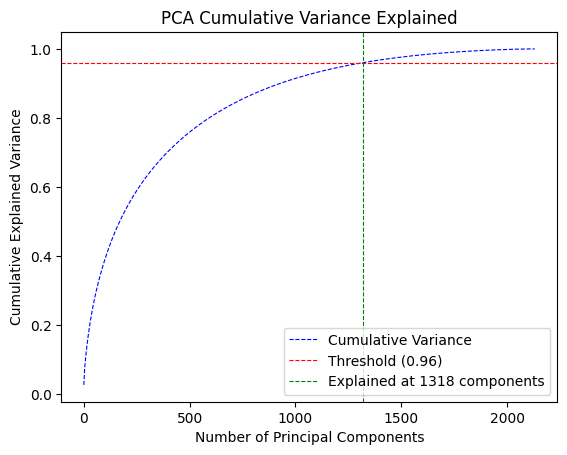

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(x_train_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
index_096 = np.argmax(cumulative_variance >= 0.96)
plt.plot(cumulative_variance,linestyle='--', color='b', linewidth=0.8, label='Cumulative Variance')
threshold = 0.96
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=0.8, label=f'Threshold ({threshold})')
plt.axvline(x=index_096, color='g', linestyle='--', linewidth=0.8, label=f'Explained at {index_096} components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Variance Explained')
plt.legend()

# Show the plot
plt.show()


#### Decision Tree Regressor

Fitting 7 folds for each of 336 candidates, totalling 2352 fits
{'max_depth': 70, 'min_samples_leaf': 4, 'min_samples_split': 30}
The RVE is:  0.4359582192922191
The rmse is:  0.20779001662172775
The Correlation Score is is: 0.6828 (p-value=0.000000e+00)

The Maximum Error is is:  0.9354113297083332
The Mean Absolute Error is:  0.1517392266989127


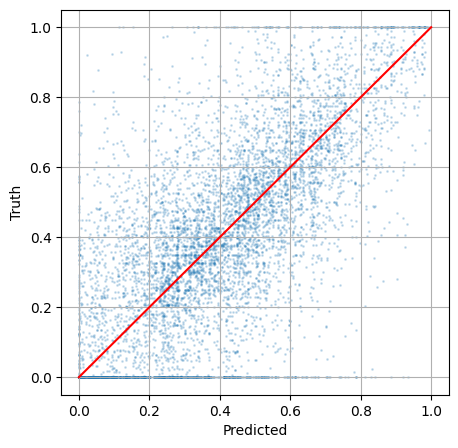

In [ ]:
param_grid_reg_tree = [
    {"max_depth" : [5,10,20,30,40,50,60,70],
    "min_samples_leaf" : [1,4,5,6],
    "min_samples_split" : [20,25,30,35,40,45]}]


# Perform a grid search for hyperparameter tuning
grid_search_reg_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_reg_tree, scoring='explained_variance', cv=kf,n_jobs=-1,verbose=1)
grid_search_reg_tree.fit(x_train_rf, y_train)

# Get the best hyperparameters from the grid search
print(grid_search_reg_tree.best_params_)
# Train the model with the best hyperparameters
best_reg_tree = DecisionTreeRegressor(**grid_search_reg_tree.best_params_)

truth, preds = nFoldCrossValidation(x_train_rf,y_train,best_reg_tree,kf)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)

#### Lasso Regression

Fitting 7 folds for each of 4 candidates, totalling 28 fits
{'alpha': 0.0001, 'max_iter': 1000000}
The RVE is:  0.5566029794158994
The rmse is:  0.1842083149292939
The Correlation Score is is: 0.7467 (p-value=0.000000e+00)

The Maximum Error is is:  0.8479680215244623
The Mean Absolute Error is:  0.14303698025629316


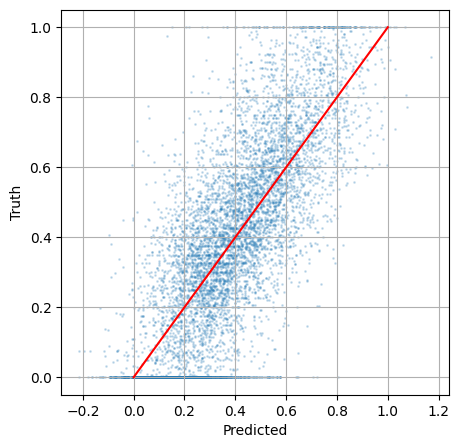

In [ ]:
param_grid_reg_lasso = [
    {"alpha" : [0.00001,0.00001,0.0001,0.0078125],
    "max_iter" : [1000000]}]
grid_search_lasso= GridSearchCV(Lasso(), param_grid_reg_lasso, scoring='explained_variance', cv=kf,n_jobs=-1,verbose=1)
grid_search_lasso = grid_search_lasso.fit(x_train_rf, y_train)
truth, preds = nFoldCrossValidation(x_train_rf,y_train,grid_search_lasso.best_estimator_,kf)
print(grid_search_lasso.best_params_)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)

#### Ridge Regression

Fitting 7 folds for each of 14 candidates, totalling 98 fits
{'alpha': 8, 'max_iter': 1000000}
The RVE is:  0.555697374534933
The rmse is:  0.18439666533204097
The Correlation Score is is: 0.7468 (p-value=0.000000e+00)

The Maximum Error is is:  0.8534374084215386
The Mean Absolute Error is:  0.14319314648068682


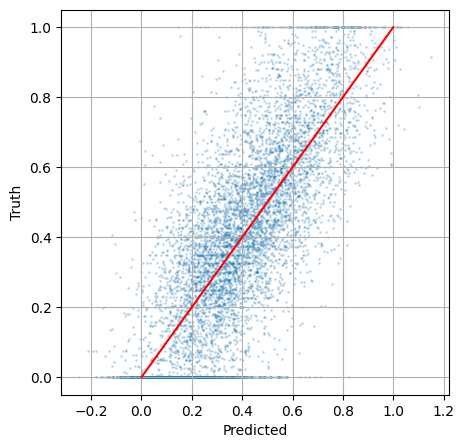

In [ ]:
param_grid_reg_ridge= [
    {"alpha" : [0.03125,0.07,0.125,0.25,0.5,0.6,0.7,0.8,0.9,1,2,4,7,8],
    "max_iter" : [1000000]}]
grid_search_ridge= GridSearchCV(Ridge(), param_grid_reg_ridge, scoring='explained_variance', cv=kf,n_jobs=-1,verbose=1)
grid_search_ridge = grid_search_ridge.fit(x_train_rf, y_train)
truth, preds = nFoldCrossValidation(x_train_rf,y_train,grid_search_ridge.best_estimator_,kf)
print(grid_search_ridge.best_params_)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)

### KNN Regression

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'uniform'}
The RVE is:  0.6399843048254661
The rmse is:  0.1660527845865495
The Correlation Score is is: 0.8022 (p-value=0.000000e+00)

The Maximum Error is is:  0.992810325
The Mean Absolute Error is:  0.11969405771558539


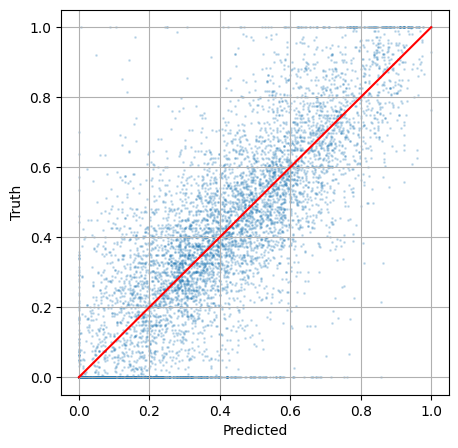

In [ ]:
param_grid_knn = [
    {"n_neighbors" : [1,2,3,4,5,6,7,8,9,10],
    "weights" : ['uniform','distance'],
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
grid_search_knn= GridSearchCV(KNeighborsRegressor(), param_grid_knn, scoring='explained_variance', cv=kf,n_jobs=-1,verbose=1)
grid_search_knn = grid_search_knn.fit(x_train_rf, y_train)
truth, preds = nFoldCrossValidation(x_train_rf,y_train,grid_search_knn.best_estimator_,kf)
print(grid_search_knn.best_params_)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)

#### Support Vector Machines - Regression using rbf, linear and sigmoid Kernels

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'kernel': 'linear', 'gamma': 10, 'epsilon': 0.1, 'C': 0.1}
The RVE is:  0.5316963017782519
The rmse is:  0.18931248122303987
The Correlation Score is is: 0.7348 (p-value=0.000000e+00)

The Maximum Error is is:  0.8302007969147297
The Mean Absolute Error is:  0.1456118628180548


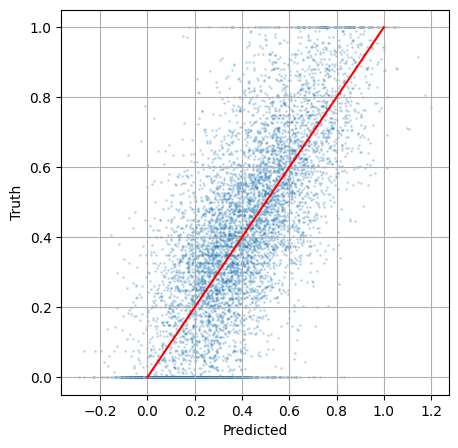

In [ ]:
param_grid_svr =[{"kernel": ['rbf','linear','sigmoid'],
         "gamma": [0.001,0.1,1,10,100],
         "C": [0.001,0.1,1,10,100,1000],
          "epsilon": [0.1,0.9,0.8]}]
grid_search_svr= RandomizedSearchCV(SVR(), param_grid_svr, scoring='explained_variance', cv=kf,n_jobs=-1,verbose=1)
grid_search_svr = grid_search_svr.fit(x_train_rf, y_train)
truth, preds = nFoldCrossValidation(x_train_rf,y_train,grid_search_svr.best_estimator_,kf)
print(grid_search_svr.best_params_)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)

### Support Vector Machine - polinomial kernel

{'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.1, 'degree': 2, 'C': 0.1}
The RVE is:  0.6251902986150133
The rmse is:  0.16939156107481546
The Correlation Score is is: 0.7911 (p-value=0.000000e+00)

The Maximum Error is is:  1.1473666166068002
The Mean Absolute Error is:  0.12918186027138953


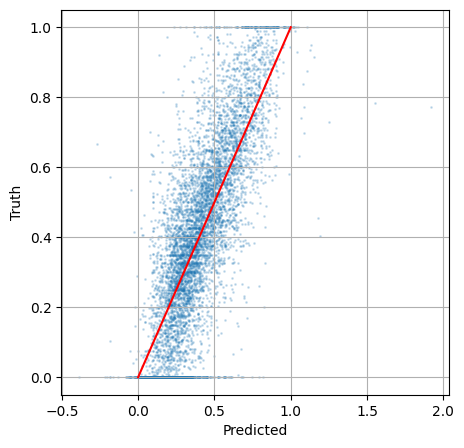

In [ ]:

param_grid_svr =[{"kernel": ['poly'],
        "gamma": [0.1,1],
         "C": [0.1,1,10],
         "degree": [2,3,4],
         "epsilon": [0.1,0.05,0.01]}]
grid_search_svr= GridSearchCV(SVR(), param_grid_svr, scoring='explained_variance', n_iter=1,cv=kf,n_jobs=-1,verbose=0)
grid_search_svr = grid_search_svr.fit(x_train_rf, y_train)
truth, preds = nFoldCrossValidation(x_train_rf,y_train,grid_search_svr.best_estimator_,kf)
print(grid_search_svr.best_params_)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)

#### Random Forest Regressor

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 25, 'criterion': 'friedman_mse'}
The RVE is:  0.6218309838966407
The rmse is:  0.17012712626468093
The Correlation Score is is: 0.7935 (p-value=0.000000e+00)

The Maximum Error is is:  0.8591833786164446
The Mean Absolute Error is:  0.12883993762108578


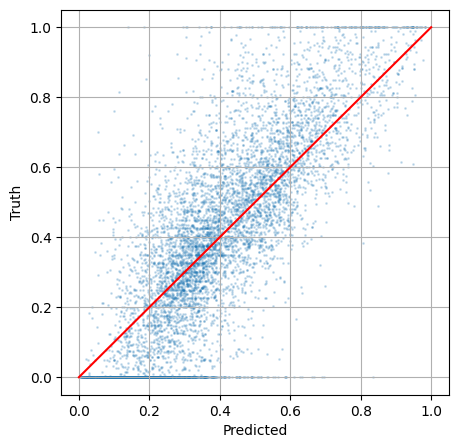

In [50]:

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [*range (5, 35, 5), None],
    "min_samples_leaf" : [1,4,5,6],
    "min_samples_split" : range (2, 40, 4),
    "criterion": ['squared_error', 'friedman_mse', 'poisson']
}
grid_search_rf= RandomizedSearchCV(RandomForestRegressor(), param_grid_rf,n_iter=20, scoring='explained_variance', cv=kf,n_jobs=-1,verbose=1)
grid_search_rf = grid_search_rf.fit(x_train_rf, y_train)
truth, preds = nFoldCrossValidation(x_train_rf,y_train,grid_search_rf.best_estimator_,kf)
print(grid_search_rf.best_params_)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)

#### Extrem Gradient Boosting Regressor

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=200. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'subsample': 0.6, 'n_estimators': 550, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.03, 'gamma': 0.01, 'colsample_bytree': 0.9}
The RVE is:  0.6758788705643264
The rmse is:  0.15752188216265178
The Correlation Score is is: 0.8224 (p-value=0.000000e+00)

The Maximum Error is is:  0.9298783540725708
The Mean Absolute Error is:  0.11541316792932055


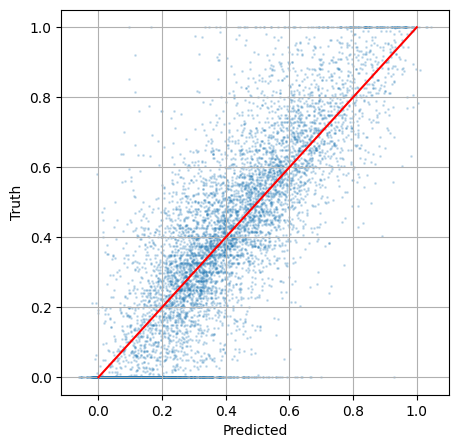

In [52]:
from sklearn.model_selection import RandomizedSearchCV


parameters_xg = {
    'max_depth': range (2, 24, 2),
    'n_estimators': range(200, 1000, 50),
    'learning_rate': np.round(np.arange(0.01, 0.20, 0.01), 5),
    'min_child_weight': [1,2, 3,5,6,7],
    'subsample': [0.5,0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0,0.01,0.001,0.0001, 0.1, 0.2, 0.3, 0.4],
}

grid_search_xgboost= RandomizedSearchCV(XGBRegressor(device="gpu"), parameters_xg, scoring='explained_variance',n_iter=200, cv=kf,n_jobs=-1,verbose=1)
grid_search_xgboost = grid_search_xgboost.fit(x_train_rf, y_train)
truth, preds = nFoldCrossValidation(x_train_rf,y_train,grid_search_xgboost.best_estimator_,kf)
print(grid_search_xgboost.best_params_)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)

#### Gradient Boosting Regressor

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 130, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.4}
The RVE is:  0.6045604434026882
The rmse is:  0.1739824909405861
The Correlation Score is is: 0.7804 (p-value=0.000000e+00)

The Maximum Error is is:  0.9697027573123358
The Mean Absolute Error is:  0.1288105015844764


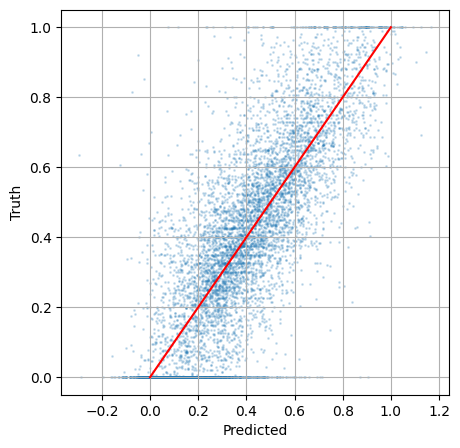

In [ ]:
parameters_gbr = {
    'max_depth': range (5, 20, 5),
    "min_samples_leaf" : [1,4,5,6],
    "min_samples_split" : range (2, 40, 4),
    'n_estimators': range(10, 150, 40),
    'learning_rate': np.round(np.arange(0, 1.0, 0.05), 2),
}

grid_search_gbr= RandomizedSearchCV(GradientBoostingRegressor(), parameters_gbr, scoring='explained_variance',n_iter=50, cv=kf,n_jobs=-1,verbose=1)
grid_search_gbr.fit(x_train_rf, y_train)
truth, preds = nFoldCrossValidation(x_train_rf,y_train,grid_search_gbr.best_estimator_,kf)
print(grid_search_gbr.best_params_)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)

#### AdaBoost Regressor

{'n_estimators': 1000, 'loss': 'square', 'learning_rate': 1, 'estimator': DecisionTreeRegressor(max_depth=5)}
The RVE is:  0.1931103299753748
The rmse is:  0.2546980217975962
The Correlation Score is is: 0.6519 (p-value=0.000000e+00)

The Maximum Error is is:  0.6362678521508969
The Mean Absolute Error is:  0.21025892662512624


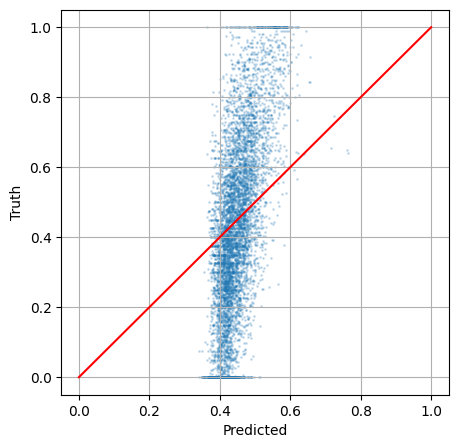

In [43]:
kf = KFold(n_splits=5, shuffle=True, random_state=23)
parameters_ada = [{"n_estimators": [100,200,300,400,500,600,700,800,900,1000],
          "learning_rate": [0.01,0.1,1],
          "estimator": [DecisionTreeRegressor(max_depth=5),DecisionTreeRegressor(max_depth=1)],
          "loss": ["linear", "square", "exponential"]}
          ]
grid_search_ada = RandomizedSearchCV(AdaBoostRegressor(), parameters_ada, scoring='explained_variance', cv=kf,n_jobs=-1)
grid_search_ada.fit(x_train_rf, y_train)
truth, preds = nFoldCrossValidation(x_train_rf,y_train,grid_search_ada.best_estimator_,kf)
print(grid_search_ada.best_params_)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)


#### Multi-Layer Perceptron Regression

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'solver': 'adam', 'max_iter': 2000, 'learning_rate': 'constant', 'hidden_layer_sizes': (360,), 'alpha': 0.0001, 'activation': 'logistic'}
The RVE is:  0.612268361485985
The rmse is:  0.17269457130258073
The Correlation Score is is: 0.7926 (p-value=0.000000e+00)

The Maximum Error is is:  0.9288703408676515
The Mean Absolute Error is:  0.12713382578352825


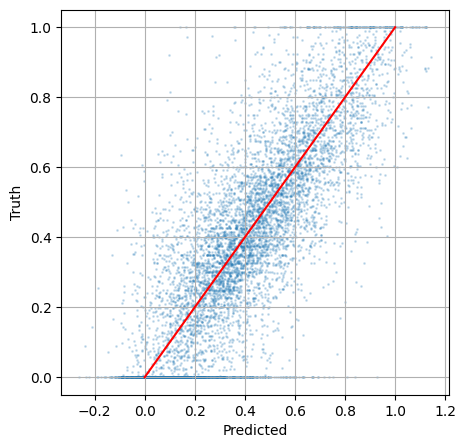

In [40]:
parameters_mlp = {
    'hidden_layer_sizes': [(360,), (200, 160), (200, 100, 69), (90,90,90,90)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive', 'invscaling'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [2000],
}
grid_search_mlp= RandomizedSearchCV(MLPRegressor(), parameters_mlp, scoring='explained_variance',n_iter=40, cv=kf,n_jobs=-1,verbose=1)
grid_search_mlp = grid_search_mlp.fit(x_train_rf, y_train)
truth, preds = nFoldCrossValidation(x_train_rf,y_train,grid_search_mlp.best_estimator_,kf)
print(grid_search_mlp.best_params_)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)

#### Final Selection and IVS Predictions

In [3]:
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))
X_train = pd.DataFrame(X_train, columns=col_names)
X_ivs = pd.DataFrame(X_ivs, columns=col_names)


scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=col_names)
x_ivs_scaled = pd.DataFrame(scaler.transform(X_ivs),columns=col_names)

_,x_train_rf,x_ivs_rf,best_rf_tresh = ML_Sel(x_train_scaled, x_ivs_scaled, y_train, 0.0002)

kf = KFold(n_splits=5, shuffle=True, random_state=23)

xgboostFinal = XGBRegressor(device="gpu",subsample=0.7, n_estimators=330, min_child_weight=9, max_depth=18, learning_rate=0.03, gamma=0.001, colsample_bytree=0.9)
truth, preds = nFoldCrossValidation(x_train_rf,y_train,xgboostFinal,kf)
evaluateRegression(truth,preds)
plotResults(preds,truth,1)

xgboostFinal = XGBRegressor(device="gpu",subsample=0.7, n_estimators=330, min_child_weight=9, max_depth=18, learning_rate=0.03, gamma=0.001, colsample_bytree=0.9)
xgboostFinal.fit(x_train_rf,y_train)
preds = xgboostFinal.predict(x_ivs_rf)
np.savetxt('19.txt', preds)